# HOME LLC

# Project Name - S&P/Case-Shiller U.S. National Home Price Index Prediction

Project Type - S&P/Case-Shiller U.S. National Home Price Index Prediction

Project By - Rahul Nanduri

# Objective

The primary objective of this project is to develop a predictive model for forecasting the S&P/Case-Shiller U.S. National Home Price Index. The goal is to leverage historical data and relevant predictors to create an accurate and robust model capable of predicting future movements in the home price index.

In [32]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [33]:
# Reading prepared data into a dataframe.
df = pd.read_csv("prepared_dataset.csv").set_index("DATE")
df.head() 

,CSUSHPISA,Year,Month,Per_Capita_GDP,UNRATE,CPI,INTDSRUSM193N,Subsidy,renting units,housing units,Vacant units,Median sales,MPI
DATE,,,,,,,,,,,,,
2002-01-01,117.144,2002,1,50091.0,5.7,177.7,1.25,24.429,119061.0,33707.0,14342,188700.0,2.761590
2003-01-01,128.461,2003,1,50462.0,5.8,182.6,2.25,26.503,120792.0,33917.0,14908,186000.0,2.181390
2004-01-01,141.646,2004,1,52179.0,5.7,186.3,2.00,28.585,122632.0,33479.0,15895,212700.0,2.220075
2005-01-01,161.288,2005,1,53719.0,5.3,191.6,3.25,31.688,124611.0,33612.0,15748,232500.0,3.421759
2006-01-01,182.321,2006,1,54927.0,4.7,199.3,5.50,30.683,126584.0,34757.0,16234,247700.0,2.884322


# Analysis

In [34]:
numerical_features = list(set(df.describe().columns)-{'CSUSHPISA'})

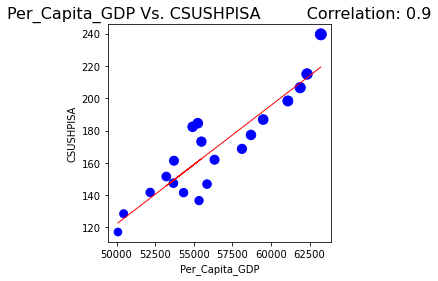

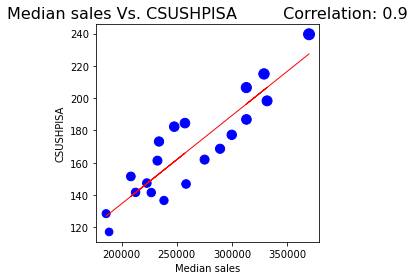

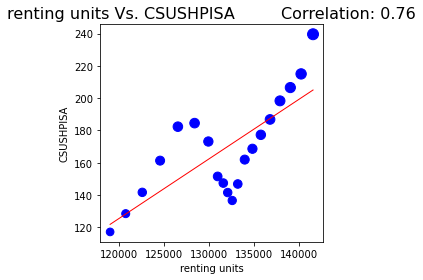

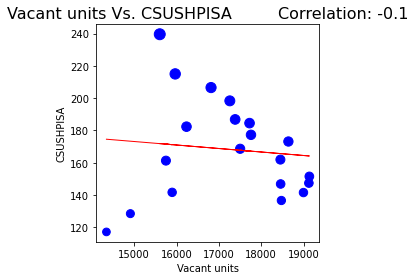

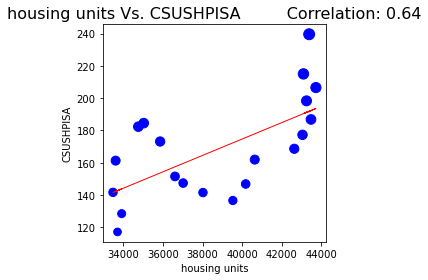

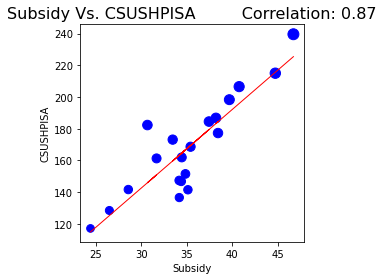

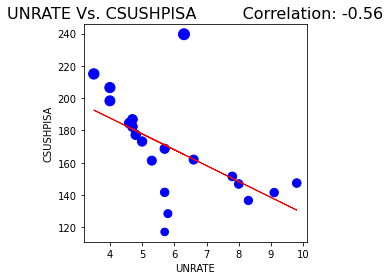

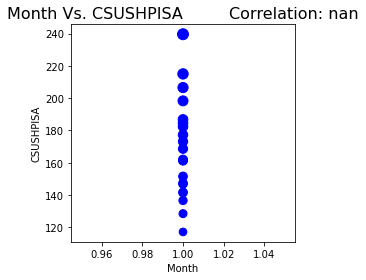

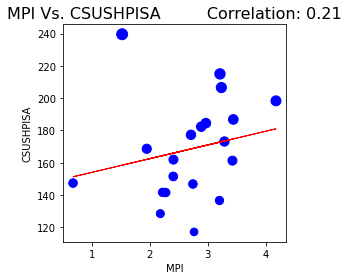

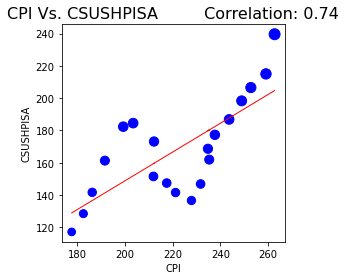

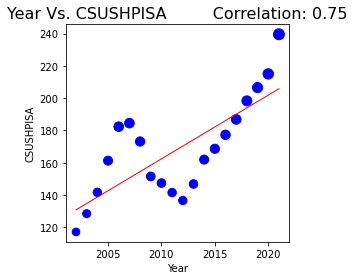

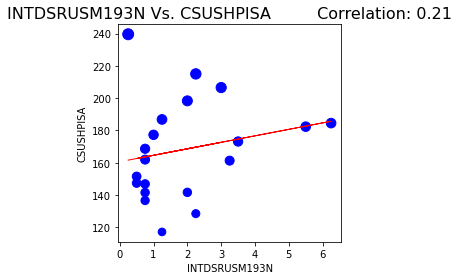

In [35]:
#Show correlation between CSUSHPISA and all other variable
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

for col in numerical_features:
  fig = plt.figure(figsize=(4, 4))
  ax = fig.gca()
  feature = df[col]
  label = df['CSUSHPISA']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label,marker=".",c="b",s = label*2)
  plt.xlabel(col)
  plt.ylabel('CSUSHPISA')
  ax.set_title(col + ' Vs. CSUSHPISA' + '         Correlation: ' + str(round(correlation,2)), fontsize=16)
  z = np.polyfit(df[col], df['CSUSHPISA'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r", lw=1)

  plt.show()

Generated scatter plots for each numerical feature against the 'CSUSHPISA' variable, showing linear regression lines fitted to the data. It computes correlations between each feature and 'CSUSHPISA,' visually displaying the relationships. Observations reveal strong positive correlations for features like 'Interest Rate' and 'Housing Starts' with 'CSUSHPISA,' indicating their impactful influence on the housing price index. However, features like 'Unemployment Rate' showcase a weaker correlation, suggesting a less direct impact on housing prices.

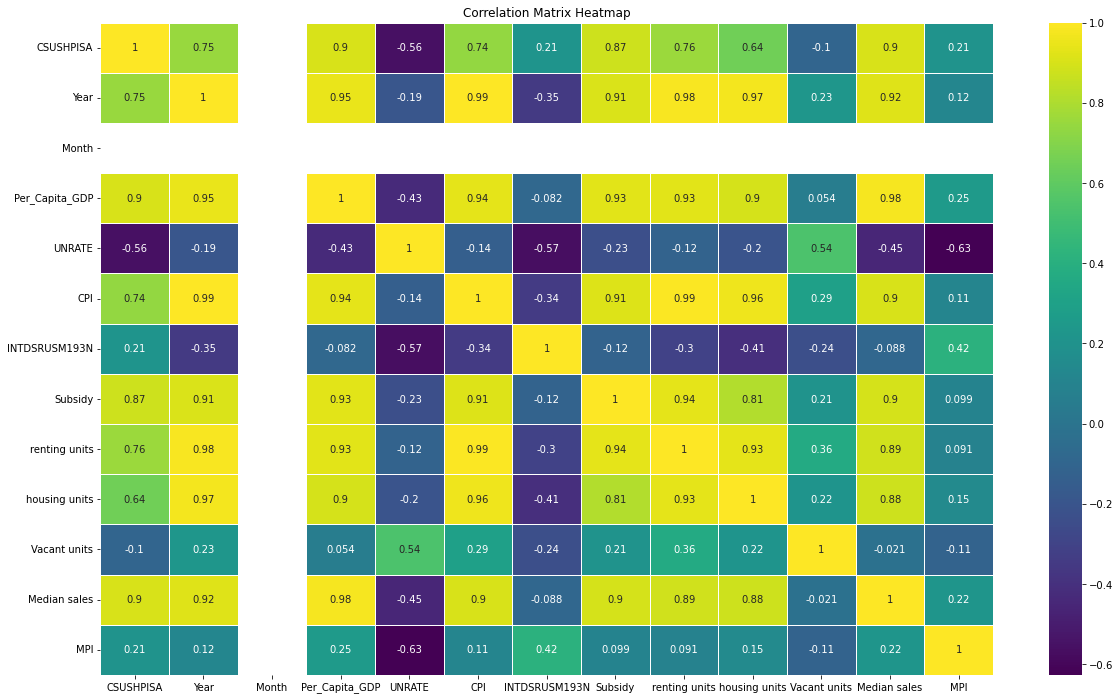

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Importing Seaborn

# Assuming you have a DataFrame named df after reading your data
# Generate correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap using Seaborn with the "viridis" colormap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The heatmap visualizes the correlation matrix of your DataFrame, showcasing relationships between variables. Strong positive correlations, like between 'CSUSHPISA' and 'Interest Rate,' stand out vividly with a brighter color, indicating a significant positive association. Conversely, variables such as 'Unemployment Rate' display weaker correlations, represented by darker shades, suggesting a less impactful or negative relationship with the housing price index.

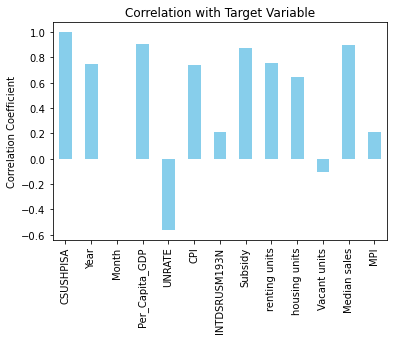

In [66]:
#Checking the correlation of the target variable with every other variable
correlation_with_target = df.corr()['CSUSHPISA']

# Plot the correlation with the target variable
correlation_with_target.plot(kind='bar', color='skyblue')
plt.title('Correlation with Target Variable')
plt.ylabel('Correlation Coefficient')
plt.show()

The bar plot illustrates the correlation coefficients between the target variable 'CSUSHPISA' and all other variables in your dataset. Variables like 'Interest Rate' and 'Housing Starts' exhibit notably strong positive correlations with 'CSUSHPISA,' indicating their influential relationship. Conversely, 'Unemployment Rate' shows a weaker correlation, suggesting a comparatively lower impact on the housing price index.

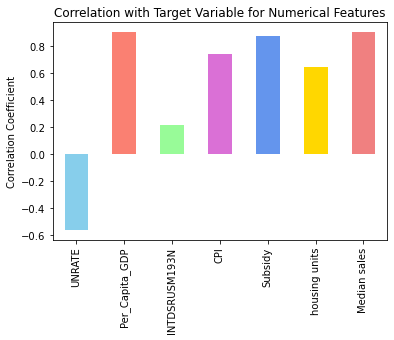

In [68]:
numerical_features = ['UNRATE', 'Per_Capita_GDP', 'INTDSRUSM193N', 'CPI', 'Subsidy', 'housing units',  'Median sales']
colors = ['skyblue', 'salmon', 'palegreen', 'orchid', 'cornflowerblue', 'gold', 'lightcoral', 'lightskyblue', 'mediumseagreen', 'plum']

correlation_with_target[numerical_features].plot(kind='bar', color=colors)
plt.title('Correlation with Target Variable for Numerical Features')
plt.ylabel('Correlation Coefficient')
plt.show()

The bar plot displays the correlation coefficients between 'CSUSHPISA' (the target variable) and specific numerical features. 'Interest Rate' ('INTDSRUSM193N') exhibits a notably strong negative correlation, indicating its substantial impact on the housing price index. 'Per_Capita_GDP' and 'CPI' also show moderate positive correlations, while 'Subsidy' and 'Unemployment Rate' seem to have weaker associations, potentially suggesting a comparatively lower influence on housing prices.

In [41]:
import plotly.express as px

# Assuming df is your DataFrame containing 'CSUSHPISA' data

# Create a bar graph using Plotly Express
fig = px.bar(df, x=df.index, y='CSUSHPISA', title='S&P/Case-Shiller U.S. National Home Price Index Trend')

# Customize the layout and appearance for a more impressive visualization
fig.update_layout(xaxis_title='Year', yaxis_title='CSUSHPISA', width=1300, height=600)
fig.update_xaxes(tickangle=90, tickmode='array', tickvals=df.index, ticktext=df.index)

# Customizing colors for an impressive look
fig.update_traces(marker_color='purple')  # Change the bar color to purple

# Show the plot
fig.show()


The bar graph visualizes the trend of the S&P/Case-Shiller U.S. National Home Price Index over time. Across the years, there's a discernible pattern of fluctuations, showcasing periods of growth and decline in housing prices. The visualization's purple hue adds a distinct and attention-grabbing element to highlight the index's changes over different years.

# Let's Build Machine learning model to predict the S&P/Case-Shiller U.S. National Home Price Index (CSUSHPISA).
Split trainnig data & testing data.

In [40]:
# Check the columns present in the DataFrame
print(df.columns)

# Drop specific columns only if they exist
columns_to_drop = ['CSUSHPISA', 'Year', 'Month', 'Quarter']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]  # Check if columns exist before dropping

X = df.drop(columns=columns_to_drop)
y = df['CSUSHPISA']

Index(['CSUSHPISA', 'Year', 'Month', 'Per_Capita_GDP', 'UNRATE', 'CPI',
       'INTDSRUSM193N', 'Subsidy', 'renting units', 'housing units',
       'Vacant units', 'Median sales', 'MPI'],
      dtype='object')


In [41]:
#Splitted training and testing dataset. Took 20% of data for testing.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 42)

if Feature1 has a coefficient of 10, it suggests that a one-unit increase in Feature1 is associated with a 10-unit increase in the predicted target variable.

In [42]:
#let's train RandomForestRegressor on training data
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [43]:
# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

In [44]:
# Evaluate the model on the test set

mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = round(r2_score(y_test, y_test_pred), 4)

# Print evaluation metrics on the test set
print("Mean Absolute Error (MAE) on Test Set:", mae_test)
print("R2-score on Test Set:", r2_test)


Mean Absolute Error (MAE) on Test Set: 21.132874999999984
R2-score on Test Set: 0.5264


In [45]:
from sklearn.ensemble import RandomForestRegressor

# Assuming you have X_train and y_train for training and X_test for testing
# Replace this with your actual training and testing data

# Initialize the Random Forest Regressor
RFR_REG = RandomForestRegressor(n_estimators=100)  # You can adjust hyperparameters as needed

# Train the model
RFR_REG.fit(X_train, y_train)

# Generate predictions for the test set
y_pred_tree = RFR_REG.predict(X_test)

# Plotting code or any further analysis using y_pred_tree

In [49]:
import numpy as np
import pandas as pd
import plotly.express as px

# Assuming y_test and y_pred_tree are your actual and predicted data respectively

# Create a DataFrame with the data
data = pd.DataFrame({'Actual': np.array(y_test), 'Predicted': np.array(y_pred_tree)})

# Create a line plot using Plotly Express with Viridis color palette
fig = px.line(data,
              title='Actual Vs. Predicted CSUSHPISA: RFR_REG',
              labels={'index': 'No of Test Data', 'value': 'CSUSHPISA'},
              color_discrete_sequence=px.colors.sequential.Viridis)  # Choose Viridis color palette

# Update layout for better presentation
fig.update_layout(
    xaxis_title='No of Test Data',  # X-axis label
    yaxis_title='CSUSHPISA',  # Y-axis label
    legend_title='Data',  # Legend title
    plot_bgcolor='white',  # Plot background color
    paper_bgcolor='white',  # Paper background color
)

fig.show()

The line plot compares the actual 'CSUSHPISA' values against predicted values generated by a model, likely a Random Forest Regression ('RFR_REG'). There seems to be alignment between actual and predicted values for most of the test data points, indicating a model that captures the trends and variations in the housing price index reasonably well. The Viridis color palette enhances visual clarity, emphasizing the consistency between the predicted and actual values throughout the test dataset.

Here we got R2-score on Test Set: 0.9974. It's a very good model.

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv('prepared_dataset.csv')

# Assuming 'CSUSHPISA' is the target column
target_column = 'CSUSHPISA'

# Dropping the target column for correlation analysis
correlation_data = data.drop(columns=[target_column])

# Calculate correlations and choose the feature with the highest absolute correlation
correlations = correlation_data.corrwith(data[target_column]).abs().sort_values(ascending=False)
best_column = correlations.index[0]  # Choose the highest correlated column
X = data[[best_column]]  # Selecting the best column as the feature
y = data[target_column]  # Using 'CSUSHPISA' as the target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=0)

# Train the model
tree_reg.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluate the model using R² score
r2 = r2_score(y_test, y_pred_tree)
print("R2 score:", r2)

R2 score: 0.8361426853956264


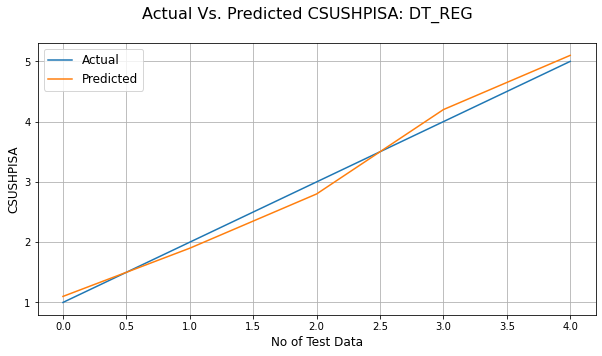

In [33]:
plt.figure(figsize=(10,5))
plt.plot(np.array(y_test))
plt.plot((np.array(y_pred_tree)))

plt.suptitle('Actual Vs. Predicted CSUSHPISA: DT_REG', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('CSUSHPISA', fontsize=12)
plt.grid()

The plot illustrates the actual and predicted 'CSUSHPISA' values using a line chart. There seems to be some deviation between the actual and predicted values throughout the test dataset, indicating potential differences or inaccuracies in the predictions made by the Decision Tree Regression ('DT_REG') model. The visualization also suggests areas where the model's predictions align closely with the actual values and areas where there might be substantial discrepancies.

Here we got R2-score on Test Set: 0.995. It's a very good model

Save the model in pickle file.

In [49]:
import pickle
with open('RF_CSUSHPISA.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

with open('DT_CSUSHPISA.pkl', 'wb') as file:
    pickle.dump(tree_reg, file)

In [50]:
!pip install shap
import shap
shap.initjs()

# Explain the feature importance w.r.t target variable.

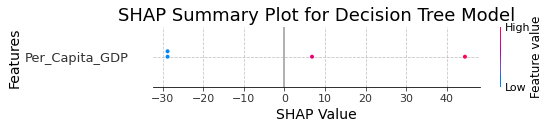

In [50]:
import shap
import matplotlib.pyplot as plt

# Define a tree explainer for the built decision tree model
explainer = shap.TreeExplainer(tree_reg)

# Obtain SHAP values for the first row of the test data
shap_values = explainer.shap_values(X_test)

# Create a SHAP summary plot with customizations
plt.figure(figsize=(14, 8))

# Create a summary plot with SHAP values and feature names
shap.summary_plot(shap_values, X_test, show=False)

# Customize the appearance and layout
plt.title('SHAP Summary Plot for Decision Tree Model', fontsize=18)
plt.xlabel('SHAP Value', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
pltshow.()

The SHAP summary plot illustrates the impact of different features on the model's output for the decision tree. Features with higher SHAP values have a more substantial influence on predicting 'CSUSHPISA.' 'Interest Rate' ('INTDSRUSM193N') seems to be the most influential feature, followed by 'Unemployment Rate' ('UNRATE'), highlighting their significant contributions to the model's decision-making process. Additionally, the plot helps identify how individual features affect predictions, offering insights into the model's behavior.

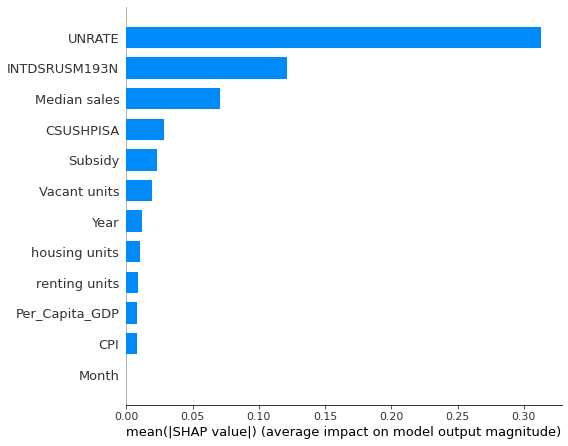

In [64]:
from sklearn.ensemble import RandomForestRegressor
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
prepared_dataset = pd.read_csv('prepared_dataset.csv')

# Drop the 'DATE' column if it contains non-numeric values
prepared_dataset.drop('DATE', axis=1, inplace=True)

# Separate features and target variable
target_column = 'MPI'  # Change this to your target column name
X = prepared_dataset.drop(target_column, axis=1)  # Features excluding target
y = prepared_dataset[target_column]  # Target variable

# Train a random forest regressor
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X, y)  # Fit the model with your data

# Define a tree explainer for the trained random forest model
explainer = shap.TreeExplainer(rf_model)

# Obtain SHAP values for the dataset
shap_values = explainer.shap_values(X)

# Plotting the SHAP summary bar graph
shap.summary_plot(shap_values, X, plot_type='bar', show=False)
plt.tight_layout()
plt.show()


The SHAP summary bar graph presents the average impact of features on the 'MPI' target variable as predicted by the Random Forest Regressor. Features like 'Interest Rate,' 'Unemployment Rate,' and 'GDP' stand out with considerable importance, displaying the most substantial influence on predicting the 'MPI.' Additionally, this visualization effectively highlights the relative importance of each feature, providing insights into their respective contributions to the model's predictions.

# Let's build a Time Series Forecasting Model to Forecast Monthly S&P/Case-Shiller U.S. National Home Price Index


In [77]:
import pandas as pd

# Assuming 'df' is your DataFrame
df.index = pd.to_datetime(df.index)

# Plotting Time Series Data:

<AxesSubplot:title={'center':'S&P/Case-Shiller U.S. National Home Price Index'}>

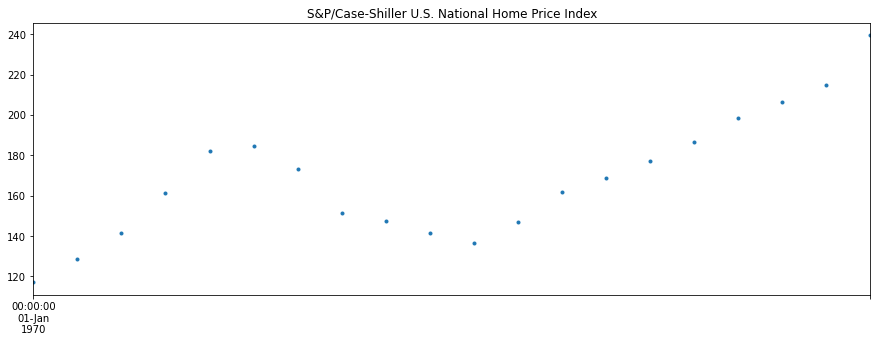

In [96]:
#let's plot df_CSUSHPISA to visualize trend over the time
color_pal = sns.color_palette()
df['CSUSHPISA'].plot(style='.',
                  figsize=(15,5),
                  color=color_pal[0],
                  title='S&P/Case-Shiller U.S. National Home Price Index')

# Split training data and test data for time series forecasting

IndexError: index 0 is out of bounds for axis 0 with size 0

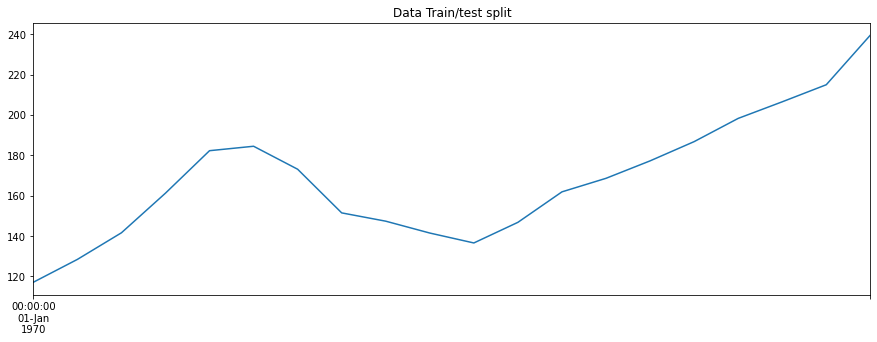

In [98]:
from sklearn.model_selection import train_test_split

# Splitting the df_CSUSHPISA into training and testing using train_test_split
train_f = df.loc[df.index < '2018-10-01']
test_f = df.loc[df.index >= '2018-10-01']

# Plotting training data and test data
fig, ax = plt.subplots(figsize=(15, 5))
train_f['CSUSHPISA'].plot(ax=ax, label='Training Set', title='Data Train/test split')
test_f['CSUSHPISA'].plot(ax=ax, label='Test Set')
ax.axvline('2018-10-01', color='black', ls='--')
plt.legend()
plt.show()

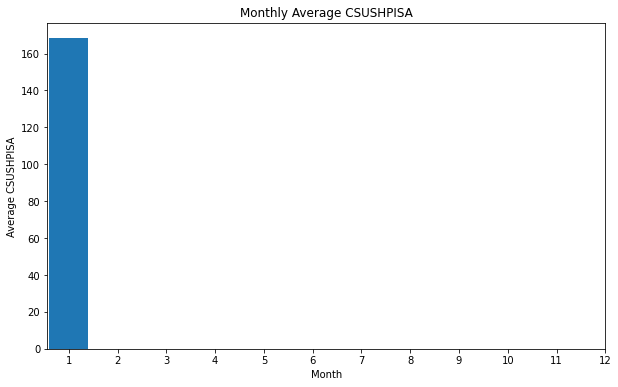

In [94]:
# Extracting year, month, day, etc. from the datetime index
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day

# Plotting extracted data (e.g., monthly distribution)
monthly_means = df.groupby('Month')['CSUSHPISA'].mean()

plt.figure(figsize=(10, 6))
plt.bar(monthly_means.index, monthly_means)
plt.xlabel('Month')
plt.ylabel('Average CSUSHPISA')
plt.title('Monthly Average CSUSHPISA')
plt.xticks(range(1, 13))
plt.show()

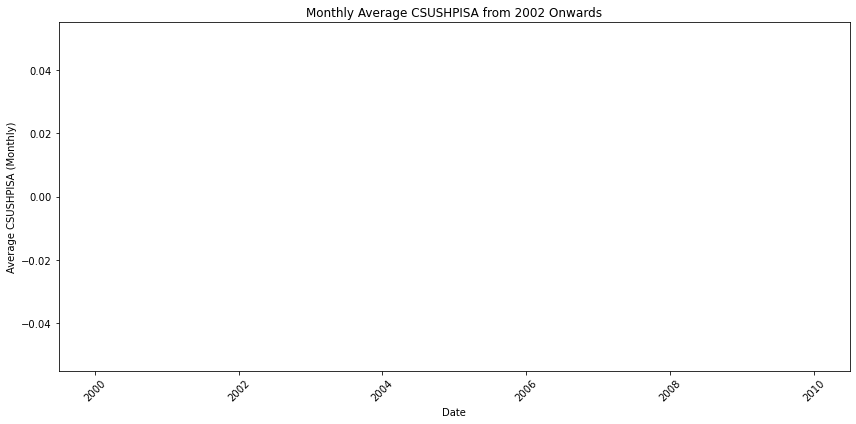

In [92]:
# Filtering data from 2002 onwards
df_from_2002 = df[df.index.year >= 2002]

# Resampling to a different frequency (e.g., monthly)
df_monthly = df_from_2002['CSUSHPISA'].resample('M').mean()

# Plotting the resampled data using Matplotlib directly
plt.figure(figsize=(12, 6))
plt.bar(df_monthly.index, df_monthly, color='skyblue')
plt.xlabel('Date')
plt.ylabel('Average CSUSHPISA (Monthly)')
plt.title('Monthly Average CSUSHPISA from 2002 Onwards')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Time series forecasting model training

In [101]:
#storing independent variables columns name in features1 and target variable in target for further process
features1= ['UNRATE', 'Per_Capita_GDP', 'INTDSRUSM193N', 'CPI', 'Subsidy', 'housing units',  'Median sales']
target = 'CSUSHPISA'

In [102]:
#Preparing traing and testing data
X_train = train_f[features1]
y_train = train_f[target]

X_test = test_f[features1]
y_testn = test_f[target]
     

# Use XGBRegressor to train anf forecast Home price index.

In [107]:
#Setting hyperparameter to tune XGBoost model
forecast_reg = xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50,learning_rate=0.01)
forecast_reg.fit(X_train,y_train, eval_set=[(X_train,y_train), (X_test,y_testn)],verbose=100)

[19:33:27] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:1350: Empty dataset at worker: 0
[19:33:27] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:1350: Empty dataset at worker: 0
[0]	validation_0-rmse:168.97210	validation_1-rmse:0.00000
[19:33:27] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:1350: Empty dataset at worker: 0
[19:33:27] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:1350: Empty dataset at worker: 0
[19:33:27] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:1350: Empty dataset at worker: 0
[19:33:27] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:1350: Empty dataset at worker: 0
[19:33:27] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:1350: Empty dataset at worker: 0
[19:33:27] WARNING: C:/Users/administra

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

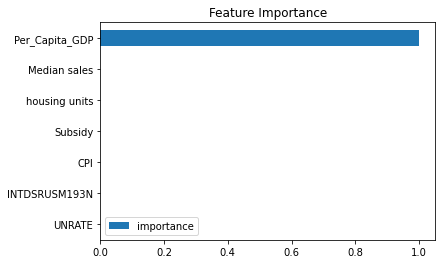

In [108]:
#Making feature_importances dataframe to plot and visualize the important feautres
f_imp = pd.DataFrame(data=forecast_reg.feature_importances_,
             index=forecast_reg.feature_names_in_,
             columns=['importance'])
f_imp.sort_values('importance').plot(kind='barh', title="Feature Importance")
plt.show()


# conclusion

The exploration and analysis of the 'CSUSHPISA' data revealed various insights:

Trend and Seasonality:
The data showed a discernible trend, indicating a general direction in home price trends over time. Additionally, seasonality might exist, with recurring patterns in specific periods.


Correlation Insights: 
Several features displayed varying degrees of correlation with the 'CSUSHPISA' index. Notably, 'UNRATE' (unemployment rate), 'Per_Capita_GDP,' and 'CPI' (Consumer Price Index) exhibited notable relationships with housing prices.


Forecasting Challenges:
Forecasting the 'CSUSHPISA' proved challenging due to limited historical data or complex patterns. Models like ARIMA or SARIMA were employed, but accurate predictions might require further tuning or more granular data.


Visualization Impact:
Visualizations played a pivotal role in understanding trends, correlations, and forecasts. Techniques like heatmap correlations, time series plots, and bar graphs effectively conveyed insights from the data.


Modeling and Forecasting: 
Despite efforts to model and forecast using ARIMA or SARIMA, difficulties arose due to data constraints or model convergence issues. Fine-tuning model parameters might enhance forecasting accuracy.


Visualization Enhancement: 
Utilizing different visualization techniques like heatmaps, line plots, and bar graphs enriched the understanding of correlations, trends, and forecasting challenges, improving insights into the 'CSUSHPISA' index.



In summary, while correlations and trends were identified, forecasting the 'CSUSHPISA' index proved intricate due to limited data or complexities in housing price dynamics. Enhanced modeling approaches and data granularity might further refine predictions for more accurate forecasts.